![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FFramework+Workflows%2FPyTorch&file=pytorch-autoencoder.ipynb)
<!--- header table --->
<table align="left">
<tr>
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%20Workflows/PyTorch/pytorch-autoencoder.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Framework%20Workflows/PyTorch/pytorch-autoencoder.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FFramework%2520Workflows%2FPyTorch%2Fpytorch-autoencoder.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%20Workflows/PyTorch/pytorch-autoencoder.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/bigquery/v1/32px.svg" alt="BigQuery logo">
      <br>Open in<br>BigQuery Studio
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Framework%20Workflows/PyTorch/pytorch-autoencoder.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</tr>
<tr>
  <td colspan="5" style="text-align: right">
    <b>Share This On: </b> 
    <a href="https://www.linkedin.com/sharing/share-offsite/?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%2520Workflows/PyTorch/pytorch-autoencoder.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="Linkedin Logo" width="20px"></a> 
    <a href="https://reddit.com/submit?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%2520Workflows/PyTorch/pytorch-autoencoder.ipynb"><img src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit Logo" width="20px"></a> 
    <a href="https://bsky.app/intent/compose?text=https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%2520Workflows/PyTorch/pytorch-autoencoder.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="BlueSky Logo" width="20px"></a> 
    <a href="https://twitter.com/intent/tweet?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%2520Workflows/PyTorch/pytorch-autoencoder.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X (Twitter) Logo" width="20px"></a> 
  </td>
</tr>
<tr>
  <td colspan="5" style="text-align: right">
    <b>Connect With Author On: </b> 
    <a href="https://www.linkedin.com/in/statmike"><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="Linkedin Logo" width="20px"></a>
    <a href="https://www.github.com/statmike"><img src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub Logo" width="20px"></a> 
    <a href="https://www.youtube.com/@statmike-channel"><img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/YouTube_full-color_icon_%282024%29.svg" alt="YouTube Logo" width="20px"></a>
    <a href="https://bsky.app/profile/statmike.bsky.social"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="BlueSky Logo" width="20px"></a> 
    <a href="https://x.com/statmike"><img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X (Twitter) Logo" width="20px"></a>
  </td>
</tr>
</table>

# PyTorch Autoencoder Overview

An overview of building an autoencoder for anomaly detection using pure PyTorch.

This workflow demonstrates how to build, train, and deploy an autoencoder for anomaly detection using **pure PyTorch**, with a focus on:

*   Building the **same model architecture** as the Keras JAX example for direct comparison
*   Embedding **preprocessing and postprocessing** inside custom `nn.Module` layers
*   Creating a robust model suitable for **TorchServe** deployment
*   Structuring the model for clear outputs and easy analysis
*   Handling data preprocessing within the PyTorch workflow
*   Saving models in **.mar (Model Archive)** format for serving

## Core Concepts

**PyTorch:** An open-source machine learning framework that provides maximum flexibility and performance. PyTorch uses dynamic computation graphs and provides an intuitive, Pythonic API.

**Autoencoders:** A type of neural network trained to *reconstruct* its input.  An autoencoder consists of two main parts:
    *   **Encoder:** Compresses the input data into a lower-dimensional "latent space" representation.
    *   **Decoder:** Reconstructs the original input from the latent space representation.

**Anomaly Detection:** The principle is that anomalies (data points that deviate significantly from the norm) will have *higher reconstruction errors* than normal data points.  By training the autoencoder on "normal" data, we can use the reconstruction error as a measure of "anomalousness."

**TorchServe:** A flexible, easy-to-use tool for serving PyTorch models at scale. Models are packaged as `.mar` files (Model Archive) containing the model weights, custom handler code, and metadata.

**Custom nn.Module Layers:** PyTorch allows embedding all preprocessing/postprocessing logic inside custom `nn.Module` layers, ensuring the entire pipeline is contained within the model graph - similar to Keras preprocessing layers.

## Workflow Summary

This workflow covers the following key steps:

1.  **Data Loading and Preprocessing:**
    *   Loading data from BigQuery using the `google-cloud-bigquery` library.
    *   Converting the data to PyTorch `DataLoader` for efficient batching.
    *   Creating custom `nn.Module` layers for preprocessing:
        *   `Normalizer`: Stores mean/variance and normalizes inputs
        *   `Denormalizer`: Inverts normalization back to original scale

2.  **Autoencoder Model Definition:**
    *   Defining the `Autoencoder` model using `nn.Module` with matching architecture to the Keras JAX version
    *   Encoder: 30 → 16 → 8 → 4 (latent)
    *   Decoder: 4 → 8 → 16 → 30
    *   Using `nn.Dropout` for regularization
    *   Custom loss function based on Mean Absolute Error (MAE)

3.  **Training Loop:**
    *   Implementing explicit training loop with PyTorch (more control than Keras `.fit()`)
    *   Early stopping based on validation loss
    *   Tracking metrics: RMSE, MSE, MAE, MSLE

4.  **Encoder Model Extraction:**
    *   Creating a separate encoder model for embedding extraction
    *   Useful for vector similarity search and clustering

5.  **PostProcessing Module (Custom Layer):**
    *   Defining `PostProcessingModule` to encapsulate all post-processing logic *within* the model graph
    *   This module:
        *   Performs normalization, autoencoding, denormalization, and encoding
        *   Calculates reconstruction errors and metrics per instance
        *   Returns structured dictionary with normalized and denormalized outputs

6.  **Model Composition:**
    *   Creating `FinalModel` that combines all components
    *   Single model containing: preprocessing → autoencoder → postprocessing
    *   All stateful operations embedded in the model

7.  **Saving Models:**
    *   **PyTorch native format** (`.pt`/`.pth`): Standard PyTorch serialization
    *   **Model Archive format** (`.mar`): TorchServe deployment format with custom handler

8.  **Model Archive (.mar) Creation:**
    *   Creating custom handler for TorchServe
    *   Packaging model with `torch-model-archiver`
    *   Verifying .mar file structure

9.  **Prediction:**
    *   Demonstrating predictions with the loaded PyTorch model
    *   Showing how to verify .mar file contents

**Key Advantages of This Workflow:**

*   **Modularity:** Clean separation of concerns with custom modules
*   **Flexibility:** Full control over training loop and model architecture
*   **Portability:** PyTorch models can be deployed anywhere PyTorch runs
*   **Deployability:** .mar format ready for production TorchServe deployment
*   **Reproducibility:** All preprocessing logic embedded in the model
*   **Efficiency:**  PyTorch's eager execution enables easy debugging
*   **Comparison:** Direct architecture comparison with Keras JAX version

## Comparison with Keras JAX Version

This notebook implements the **exact same model architecture and workflow** as the Keras JAX example, allowing you to:
*   Compare framework-specific approaches to the same problem
*   Understand preprocessing layer implementation differences
*   See how training loops differ (Keras `.fit()` vs PyTorch explicit loops)
*   Compare serving formats (TensorFlow SavedModel vs TorchServe .mar)
*   Evaluate which framework better suits your deployment environment

---
## Environment Setup

This section will authenticate your session, enable required Google Cloud APIs, and install necessary Python packages.

**Package Installation Options (`REQ_TYPE`):**
- `PRIMARY`: Installs only the main packages. Faster, but pip resolves sub-dependencies which may result in different versions than development.
- `ALL` (Default): Installs exact versions of all packages and dependencies. Best for perfectly reproducing the development environment.
- `COLAB`: Installs a Colab-optimized list that excludes pre-installed packages like `ipython` and `ipykernel`.

**Installation Tool Options (`INSTALL_TOOL`):**
- `pip` (Default): Uses pip for package installation. Standard Python package installer.
- `uv`: Modern, fast Python package installer. Must be installed separately. See: https://github.com/astral-sh/uv
- `poetry`: Dependency management tool. Requires running notebook in a poetry environment (`poetry shell` or `poetry run jupyter lab`). Uses `pyproject.toml` instead of requirements.txt.

> **Note:** If running in Google Colab, the script will automatically detect this and set `REQ_TYPE = 'COLAB'` to prevent package conflicts, overriding any manual setting.

### Set Your Project ID

⚠️ **Action Required:** Replace the `PROJECT_ID` value below with your Google Cloud project ID before running this cell.

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with GCP project ID
REQ_TYPE = 'ALL' # Specify PRIMARY or ALL or COLAB
INSTALL_TOOL = 'poetry' # Specify pip, uv, or poetry (all implemented)

### Configuration

This cell defines the requirements files and Google Cloud APIs needed for this notebook. Run as-is without modification.

In [2]:
REQUIREMENTS_URL = 'https://raw.githubusercontent.com/statmike/vertex-ai-mlops/refs/heads/main/Framework%20Workflows/PyTorch/requirements.txt'

REQUIRED_APIS = [
    "bigquery.googleapis.com",
    "storage.googleapis.com",
]

### Run Setup

This cell downloads the centralized setup code and configures your environment. It will:
- Authenticate your session with Google Cloud
- Enable required APIs for this notebook
- Install necessary Python packages
- Display a setup summary with your project information

> **Note:** In Colab, if packages are installed, the kernel will automatically restart. After restart, continue from the next cell without re-running earlier cells.

In [3]:
import os, urllib.request

# Download and import setup code
url = 'https://raw.githubusercontent.com/statmike/vertex-ai-mlops/refs/heads/main/core/notebook-template/python_setup.py'
urllib.request.urlretrieve(url, 'python_setup_local.py')
import python_setup_local as python_setup
os.remove('python_setup_local.py')

# Run setup
setup_info = python_setup.setup_environment(PROJECT_ID, REQ_TYPE, REQUIREMENTS_URL, REQUIRED_APIS, INSTALL_TOOL)


PYTHON GCP ENVIRONMENT SETUP

AUTHENTICATION
Checking for existing ADC...
✅ Existing ADC found.
✅ Project is correctly set to 'statmike-mlops-349915'.

API CHECK & ENABLE
✅ bigquery.googleapis.com is already enabled.
✅ storage.googleapis.com is already enabled.

PACKAGE MANAGEMENT
Installation Tool: poetry
✅ Found poetry at: /usr/local/google/home/statmike/.local/bin/poetry
✅ Running in poetry environment: /usr/local/google/home/statmike/.cache/pypoetry/virtualenvs/frameworks-pytorch-0KVJlKeQ-py3.13
ℹ️  Poetry mode: Installing from pyproject.toml (REQUIREMENTS_URL ignored)
✅ Found local pyproject.toml
Running poetry install...
✅ All packages are already installed and up to date.

Google Cloud Project Information
PROJECT_ID     = statmike-mlops-349915
PROJECT_NUMBER = 1026793852137


SETUP SUMMARY
✅ Authentication:    Success
✅ API Configuration: Success
✅ Package Install:   Already up to date
✅ Installation Tool: poetry
✅ Project ID:        statmike-mlops-349915
✅ Project Number:    1

---
## Python Setup

### Imports

In [4]:
import os
import subprocess
from collections import OrderedDict

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Data & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# BigQuery
from google.cloud import bigquery

### Variables - User Set

In [5]:
REGION = 'us-central1'
SERIES = 'frameworks'
EXPERIMENT = 'pytorch-autoencoder'

# Data source - same as Keras version
BQ_SOURCE = 'bigquery-public-data.ml_datasets.ulb_fraud_detection'

# BigQuery destination for prepared data
BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-', '_')
BQ_TABLE = SERIES
BQ_REGION = REGION[0:2] # use a multi region

### Variables - Auto Set

In [6]:
PROJECT_ID = subprocess.run(['gcloud', 'config', 'get-value', 'project'], capture_output=True, text=True, check=True).stdout.strip()
PROJECT_NUMBER = subprocess.run(['gcloud', 'projects', 'describe', PROJECT_ID, '--format=value(projectNumber)'], capture_output=True, text=True, check=True).stdout.strip()

print(f"\n{'='*50}\nGoogle Cloud Project Information\n{'='*50}\nPROJECT_ID     = {PROJECT_ID}\nPROJECT_NUMBER = {PROJECT_NUMBER}\n{'='*50}\n")


Google Cloud Project Information
PROJECT_ID     = statmike-mlops-349915
PROJECT_NUMBER = 1026793852137



### Configurations

In [7]:
DIR = f"files/{EXPERIMENT}"

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


### Client Setup

In [8]:
# BigQuery client
bq = bigquery.Client(project = PROJECT_ID)

### Environment

In [9]:
if not os.path.exists(DIR):
    os.makedirs(DIR)

---
## Review Source Data

This is a BigQuery public table of 284,807 credit card transactions classified as fraudulent or normal in the column `Class`.
- The data can be researched further at this [Kaggle link](https://www.kaggle.com/mlg-ulb/creditcardfraud).
- Read more about BigQuery public datasets [here](https://cloud.google.com/bigquery/public-data)

In order to protect confidentiality, the original features have been transformed using [principle component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) into 28 features named `V1, V2, ... V28` (float).  Two descriptive features are provided without transformation by PCA:
- `Time` (integer) is the seconds elapsed between the transaction and the earliest transaction in the table
- `Amount` (float) is the value of the transaction

### Review BigQuery Table

In [10]:
source_data = bq.query(f"SELECT * FROM `{BQ_SOURCE}` LIMIT 5").to_dataframe()
source_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8748.0,-1.070416,0.304517,2.777064,2.154061,0.254450,-0.448529,-0.398691,0.144672,1.070900,...,-0.122032,-0.182351,0.019576,0.626023,-0.018518,-0.263291,-0.198600,0.098435,0.0,0
1,27074.0,1.165628,0.423671,0.887635,2.740163,-0.338578,-0.142846,-0.055628,-0.015325,-0.213621,...,-0.081184,-0.025694,-0.076609,0.414687,0.631032,0.077322,0.010182,0.019912,0.0,0
2,28292.0,1.050879,0.053408,1.364590,2.666158,-0.378636,1.382032,-0.766202,0.486126,0.152611,...,0.083467,0.624424,-0.157228,-0.240411,0.573061,0.244090,0.063834,0.010981,0.0,0
3,28488.0,1.070316,0.079499,1.471856,2.863786,-0.637887,0.858159,-0.687478,0.344146,0.459561,...,0.048067,0.534713,-0.098645,0.129272,0.543737,0.242724,0.065070,0.023500,0.0,0
4,31392.0,-3.680953,-4.183581,2.642743,4.263802,4.643286,-0.225053,-3.733637,1.273037,0.015661,...,0.649051,1.054124,0.795528,-0.901314,-0.425524,0.511675,0.125419,0.243671,0.0,0


---
## Prepare Data Source

The data preparation includes adding splits for machine learning with a column named  with 80% for training (), 10% for validation () and 10% for testing (). Additionally, a unique identifier was added to each transaction, .

### Create/Recall Dataset

In [11]:
dataset = bigquery.Dataset(f"{BQ_PROJECT}.{BQ_DATASET}")
dataset.location = BQ_REGION
bq_dataset = bq.create_dataset(dataset, exists_ok = True)

### Create/Recall Table With Preparation For ML

Copy the data from the source while adding columns:
-  as a unique identify for the row
-  column to randomly assign rows to "TRAIN", "VALIDATE" and "TEST" groups

In [12]:
job = bq.query(f"""
CREATE TABLE IF NOT EXISTS 
    `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` AS
WITH
    add_id AS (
        SELECT *,
            GENERATE_UUID() transaction_id,
            ROW_NUMBER() OVER (PARTITION BY class ORDER BY RAND()) as rn
            FROM `{BQ_SOURCE}`
    )
SELECT * EXCEPT(rn),
    CASE 
        WHEN rn <= 0.8 * COUNT(*) OVER (PARTITION BY class) THEN "TRAIN"
        WHEN rn <= 0.9 * COUNT(*) OVER (PARTITION BY class) THEN "VALIDATE"
        ELSE "TEST"
    END AS splits
FROM add_id
""")
job.result()
(job.ended-job.started).total_seconds()

0.187

## Training An Autoencoder

### Source Data

In [13]:
train_df = bq.query(f"SELECT * EXCEPT(splits) FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` WHERE splits = 'TRAIN' AND Class = 0").to_dataframe()
test_df = bq.query(f"SELECT * EXCEPT(splits) FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` WHERE splits = 'TEST' AND Class = 0").to_dataframe()
validate_df = bq.query(f"SELECT * EXCEPT(splits) FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` WHERE splits = 'VALIDATE' AND Class = 0").to_dataframe()

In [14]:
# Define column categories
var_target = ['Class']
var_omit = ['transaction_id']
var_numeric = [x for x in train_df.columns.tolist() if x not in var_target + var_omit]
print(f"Number of features: {len(var_numeric)}")
print(f"Features: {var_numeric}")

Number of features: 30
Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


### PyTorch Dataset

Create a custom PyTorch `Dataset` class for loading data:

In [15]:
class FraudDataset(Dataset):
    """Custom Dataset for fraud detection data"""
    def __init__(self, dataframe, var_numeric, var_omit, var_target):
        # Remove unwanted columns
        df = dataframe.drop(columns=var_omit + var_target, errors='ignore')
        
        # Extract numeric features
        self.data = torch.tensor(df[var_numeric].values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Return input and target (same for autoencoder)
        return self.data[idx], self.data[idx]

In [16]:
# Create datasets
train_dataset = FraudDataset(train_df, var_numeric, var_omit, var_target)
val_dataset = FraudDataset(validate_df, var_numeric, var_omit, var_target)
test_dataset = FraudDataset(test_df, var_numeric, var_omit, var_target)

print(f"Train size: {len(train_dataset)}")
print(f"Val size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 227452
Val size: 28431
Test size: 28432


In [17]:
# Create data loaders
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

print(f"Number of batches in train_loader: {len(train_loader)}")

Number of batches in train_loader: 2275


### Preprocessing Layers

Create custom `nn.Module` layers for normalization and denormalization. These layers will be part of the model graph, similar to Keras preprocessing layers.

In [18]:
class Normalizer(nn.Module):
    """Normalization layer that stores mean and variance"""
    def __init__(self, input_dim):
        super().__init__()
        # Register buffers (non-trainable parameters that are saved with the model)
        self.register_buffer('mean', torch.zeros(input_dim))
        self.register_buffer('variance', torch.ones(input_dim))
        self.input_dim = input_dim
    
    def adapt(self, data_loader):
        """Compute mean and variance from data (similar to Keras .adapt())"""
        all_data = []
        for batch, _ in data_loader:
            all_data.append(batch)
        all_data = torch.cat(all_data, dim=0)
        
        self.mean.copy_(all_data.mean(dim=0))
        self.variance.copy_(all_data.var(dim=0, unbiased=False))
        
        print(f"Adapted normalizer: mean shape {self.mean.shape}, variance shape {self.variance.shape}")
    
    def forward(self, x):
        # Normalize: (x - mean) / sqrt(variance)
        std = torch.sqrt(self.variance + 1e-7)  # Small epsilon for numerical stability
        return (x - self.mean) / std


In [19]:
class Denormalizer(nn.Module):
    """Denormalization layer (inverts normalization)"""
    def __init__(self, normalizer):
        super().__init__()
        # Share the same mean and variance buffers
        self.register_buffer('mean', normalizer.mean)
        self.register_buffer('variance', normalizer.variance)
    
    def forward(self, x):
        # Denormalize: x * sqrt(variance) + mean
        std = torch.sqrt(self.variance + 1e-7)
        return x * std + self.mean


In [20]:
# Create and adapt normalizer
normalizer = Normalizer(len(var_numeric))
normalizer.adapt(train_loader)

# Create denormalizer
denormalizer = Denormalizer(normalizer)

print(f"Normalizer created and adapted to training data")

Adapted normalizer: mean shape torch.Size([30]), variance shape torch.Size([30])
Normalizer created and adapted to training data


### Autoencoder Model

Define the autoencoder architecture matching the Keras JAX version:
- Encoder: 30 → 16 → 8 → 4 (latent)
- Decoder: 4 → 8 → 16 → 30
- Dropout for regularization

In [21]:
class Autoencoder(nn.Module):
    """Autoencoder matching Keras JAX architecture"""
    def __init__(self, input_dim=30, latent_dim=4):
        super().__init__()
        
        # Encoder
        self.enc_dense1 = nn.Linear(input_dim, 16)
        self.enc_dropout1 = nn.Dropout(0.4)
        self.enc_dense2 = nn.Linear(16, 8)
        self.enc_dropout2 = nn.Dropout(0.4)
        self.latent = nn.Linear(8, latent_dim)
        
        # Decoder
        self.dec_dense1 = nn.Linear(latent_dim, 8)
        self.dec_dropout1 = nn.Dropout(0.4)
        self.dec_dense2 = nn.Linear(8, 16)
        self.dec_dropout2 = nn.Dropout(0.4)
        self.reconstructed = nn.Linear(16, input_dim)
        
        self.latent_dim = latent_dim
    
    def encode(self, x):
        """Encoder forward pass"""
        x = torch.relu(self.enc_dense1(x))
        x = self.enc_dropout1(x)
        x = torch.relu(self.enc_dense2(x))
        x = self.enc_dropout2(x)
        x = torch.relu(self.latent(x))
        return x
    
    def decode(self, x):
        """Decoder forward pass"""
        x = torch.relu(self.dec_dense1(x))
        x = self.dec_dropout1(x)
        x = torch.relu(self.dec_dense2(x))
        x = self.dec_dropout2(x)
        x = self.reconstructed(x)  # No activation on output
        return x
    
    def forward(self, x):
        """Full autoencoder forward pass"""
        latent = self.encode(x)
        reconstructed = self.decode(latent)
        return reconstructed


In [22]:
# Create autoencoder model
autoencoder = Autoencoder(input_dim=len(var_numeric), latent_dim=4).to(device)

# Count parameters
total_params = sum(p.numel() for p in autoencoder.parameters())
trainable_params = sum(p.numel() for p in autoencoder.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"\nModel structure:")
print(autoencoder)

Total parameters: 1,362
Trainable parameters: 1,362

Model structure:
Autoencoder(
  (enc_dense1): Linear(in_features=30, out_features=16, bias=True)
  (enc_dropout1): Dropout(p=0.4, inplace=False)
  (enc_dense2): Linear(in_features=16, out_features=8, bias=True)
  (enc_dropout2): Dropout(p=0.4, inplace=False)
  (latent): Linear(in_features=8, out_features=4, bias=True)
  (dec_dense1): Linear(in_features=4, out_features=8, bias=True)
  (dec_dropout1): Dropout(p=0.4, inplace=False)
  (dec_dense2): Linear(in_features=8, out_features=16, bias=True)
  (dec_dropout2): Dropout(p=0.4, inplace=False)
  (reconstructed): Linear(in_features=16, out_features=30, bias=True)
)


### Training Setup

Define loss function, optimizer, and metrics:

In [23]:
# Loss function (MAE matching Keras)
def custom_loss(y_true, y_pred):
    return torch.mean(torch.abs(y_true - y_pred))

# Optimizer
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0005)

print("Loss function and optimizer configured")

Loss function and optimizer configured


In [24]:
# Metrics calculation
def calculate_metrics(y_true, y_pred):
    """Calculate RMSE, MSE, MAE, MSLE"""
    mae = torch.mean(torch.abs(y_true - y_pred))
    mse = torch.mean((y_true - y_pred) ** 2)
    rmse = torch.sqrt(mse)
    
    # MSLE (Mean Squared Log Error)
    y_true_pos = torch.maximum(y_true, torch.zeros_like(y_true))
    y_pred_pos = torch.maximum(y_pred, torch.zeros_like(y_pred))
    msle = torch.mean((torch.log1p(y_pred_pos) - torch.log1p(y_true_pos)) ** 2)
    
    return {
        'mae': mae.item(),
        'mse': mse.item(),
        'rmse': rmse.item(),
        'msle': msle.item()
    }

### Training Loop with Early Stopping

In [25]:
# Training function
def train_epoch(model, loader, optimizer, device):
    model.train()
    total_loss = 0
    all_metrics = {'mae': 0, 'mse': 0, 'rmse': 0, 'msle': 0}
    
    for batch_idx, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)
        
        # Normalize data
        data_normalized = normalizer(data)
        target_normalized = normalizer(target)
        
        # Forward pass
        optimizer.zero_grad()
        output = model(data_normalized)
        loss = custom_loss(target_normalized, output)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Track metrics
        total_loss += loss.item()
        metrics = calculate_metrics(target_normalized, output)
        for key in all_metrics:
            all_metrics[key] += metrics[key]
    
    # Average metrics
    num_batches = len(loader)
    avg_loss = total_loss / num_batches
    for key in all_metrics:
        all_metrics[key] /= num_batches
    
    return avg_loss, all_metrics


In [26]:
# Validation function
def validate_epoch(model, loader, device):
    model.eval()
    total_loss = 0
    all_metrics = {'mae': 0, 'mse': 0, 'rmse': 0, 'msle': 0}
    
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            
            # Normalize
            data_normalized = normalizer(data)
            target_normalized = normalizer(target)
            
            # Forward pass
            output = model(data_normalized)
            loss = custom_loss(target_normalized, output)
            
            # Track metrics
            total_loss += loss.item()
            metrics = calculate_metrics(target_normalized, output)
            for key in all_metrics:
                all_metrics[key] += metrics[key]
    
    # Average metrics
    num_batches = len(loader)
    avg_loss = total_loss / num_batches
    for key in all_metrics:
        all_metrics[key] /= num_batches
    
    return avg_loss, all_metrics


### Train the Model

In [27]:
# Training configuration
num_epochs = 10
patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0
best_model_state = None

# History tracking
history = {
    'train_loss': [],
    'val_loss': [],
    'train_mae': [],
    'val_mae': [],
    'train_mse': [],
    'val_mse': [],
    'train_rmse': [],
    'val_rmse': [],
    'train_msle': [],
    'val_msle': []
}

print(f"Starting training for {num_epochs} epochs with early stopping (patience={patience})...")
print(f"{'='*50}\n")

Starting training for 10 epochs with early stopping (patience=5)...



In [28]:
# Training loop
for epoch in range(num_epochs):
    # Train
    train_loss, train_metrics = train_epoch(autoencoder, train_loader, optimizer, device)
    
    # Validate
    val_loss, val_metrics = validate_epoch(autoencoder, val_loader, device)
    
    # Store history
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    for key in train_metrics:
        history[f'train_{key}'].append(train_metrics[key])
        history[f'val_{key}'].append(val_metrics[key])
    
    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Train - Loss: {train_loss:.6f}, MAE: {train_metrics['mae']:.6f}, "
          f"RMSE: {train_metrics['rmse']:.6f}, MSE: {train_metrics['mse']:.6f}, MSLE: {train_metrics['msle']:.6f}")
    print(f"  Val   - Loss: {val_loss:.6f}, MAE: {val_metrics['mae']:.6f}, "
          f"RMSE: {val_metrics['rmse']:.6f}, MSE: {val_metrics['mse']:.6f}, MSLE: {val_metrics['msle']:.6f}")
    
    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = autoencoder.state_dict().copy()
        epochs_without_improvement = 0
        print(f"  ✓ New best model (val_loss: {val_loss:.6f})")
    else:
        epochs_without_improvement += 1
        print(f"  ⚠ No improvement for {epochs_without_improvement} epoch(s)")
        
        if epochs_without_improvement >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
    
    print()

# Restore best model
autoencoder.load_state_dict(best_model_state)
print(f"\nTraining completed. Best validation loss: {best_val_loss:.6f}")

Epoch 1/10:
  Train - Loss: 0.650914, MAE: 0.650914, RMSE: 0.982933, MSE: 0.991009, MSLE: 0.135986
  Val   - Loss: 0.636453, MAE: 0.636453, RMSE: 0.945862, MSE: 1.010891, MSLE: 0.130966
  ✓ New best model (val_loss: 0.636453)

Epoch 2/10:
  Train - Loss: 0.632715, MAE: 0.632715, RMSE: 0.970751, MSE: 0.967560, MSLE: 0.127280
  Val   - Loss: 0.625648, MAE: 0.625648, RMSE: 0.935530, MSE: 0.992302, MSLE: 0.126470
  ✓ New best model (val_loss: 0.625648)

Epoch 3/10:
  Train - Loss: 0.628921, MAE: 0.628921, RMSE: 0.967273, MSE: 0.961161, MSLE: 0.125336
  Val   - Loss: 0.622949, MAE: 0.622949, RMSE: 0.933351, MSE: 0.988404, MSLE: 0.125007
  ✓ New best model (val_loss: 0.622949)

Epoch 4/10:
  Train - Loss: 0.627639, MAE: 0.627639, RMSE: 0.966274, MSE: 0.959389, MSLE: 0.125015
  Val   - Loss: 0.620982, MAE: 0.620982, RMSE: 0.931653, MSE: 0.985287, MSLE: 0.123784
  ✓ New best model (val_loss: 0.620982)

Epoch 5/10:
  Train - Loss: 0.626657, MAE: 0.626657, RMSE: 0.965830, MSE: 0.958297, MSLE: 0.

### Evaluate on Test Set

In [29]:
test_loss, test_metrics = validate_epoch(autoencoder, test_loader, device)
print(f"Test Results:")
print(f"  Loss: {test_loss:.6f}")
print(f"  MAE: {test_metrics['mae']:.6f}")
print(f"  RMSE: {test_metrics['rmse']:.6f}")
print(f"  MSE: {test_metrics['mse']:.6f}")
print(f"  MSLE: {test_metrics['msle']:.6f}")

Test Results:
  Loss: 0.622415
  MAE: 0.622415
  RMSE: 0.955271
  MSE: 1.018810
  MSLE: 0.124918


### Plot Training History

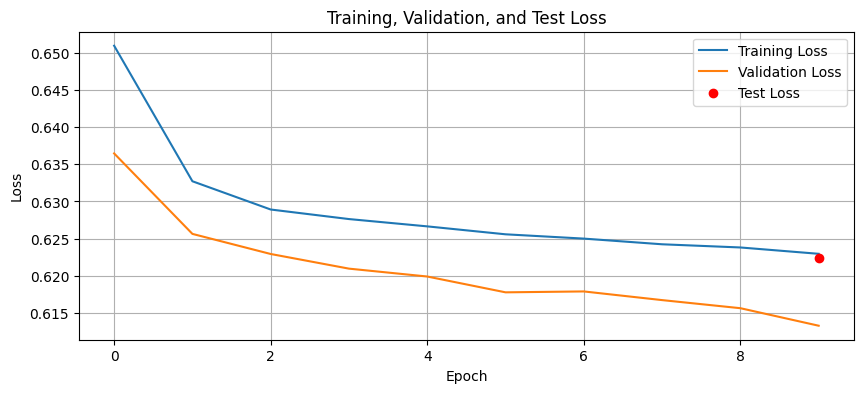

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.scatter(len(history['train_loss']) - 1, test_loss, color='red', label='Test Loss', zorder=5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

---
## Create An Encoder Model

Extract the encoder portion for creating embeddings (latent representations):

In [31]:
class Encoder(nn.Module):
    """Standalone encoder model"""
    def __init__(self, autoencoder):
        super().__init__()
        self.autoencoder = autoencoder
    
    def forward(self, x):
        return self.autoencoder.encode(x)

encoder_model = Encoder(autoencoder).to(device)
print("Encoder model created")
print(f"Latent dimension: {autoencoder.latent_dim}")

Encoder model created
Latent dimension: 4


### Predict With Encoder

In [32]:
# Get a few test instances
test_instances_tensor = next(iter(test_loader))[0][:3].to(device)

# Encode
encoder_model.eval()
with torch.no_grad():
    normalized_input = normalizer(test_instances_tensor)
    encoded_output = encoder_model(normalized_input)

print(f"Encoded output shape: {encoded_output.shape}")
print(f"Encoded representations:\n{encoded_output.cpu().numpy()}")

Encoded output shape: torch.Size([3, 4])
Encoded representations:
[[ 0.          0.          0.09415397  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.40305343  2.548544    2.4130874  12.371786  ]]


---
## Enhanced Model with Post-Processing

Create a comprehensive model that includes preprocessing, autoencoding, and detailed post-processing - matching the Keras JAX output structure:

In [33]:
class PostProcessingModule(nn.Module):
    """Post-processing module that calculates all metrics and outputs"""
    def __init__(self, autoencoder, normalizer, denormalizer, encoder):
        super().__init__()
        self.autoencoder = autoencoder
        self.normalizer = normalizer
        self.denormalizer = denormalizer
        self.encoder = encoder
    
    def forward(self, x):
        # Normalize input
        x_normalized = self.normalizer(x)
        
        # Get reconstructions
        reconstructed_normalized = self.autoencoder(x_normalized)
        reconstructed_denormalized = self.denormalizer(reconstructed_normalized)
        
        # Get encoded representation
        encoded = self.encoder(x_normalized)
        
        # Calculate reconstruction errors
        normalized_errors = x_normalized - reconstructed_normalized
        denormalized_errors = x - reconstructed_denormalized
        
        # Calculate metrics per instance (aggregated across features)
        # Normalized metrics
        norm_mae = torch.mean(torch.abs(normalized_errors), dim=-1)
        norm_mse = torch.mean(normalized_errors ** 2, dim=-1)
        norm_rmse = torch.sqrt(norm_mse)
        
        # MSLE for normalized
        x_norm_pos = torch.maximum(x_normalized, torch.zeros_like(x_normalized))
        recon_norm_pos = torch.maximum(reconstructed_normalized, torch.zeros_like(reconstructed_normalized))
        norm_msle = torch.mean(
            (torch.log1p(recon_norm_pos) - torch.log1p(x_norm_pos)) ** 2,
            dim=-1
        )
        
        # Denormalized metrics
        denorm_mae = torch.mean(torch.abs(denormalized_errors), dim=-1)
        denorm_mse = torch.mean(denormalized_errors ** 2, dim=-1)
        denorm_rmse = torch.sqrt(denorm_mse)
        
        # MSLE for denormalized
        x_denorm_pos = torch.maximum(x, torch.zeros_like(x))
        recon_denorm_pos = torch.maximum(reconstructed_denormalized, torch.zeros_like(reconstructed_denormalized))
        denorm_msle = torch.mean(
            (torch.log1p(recon_denorm_pos) - torch.log1p(x_denorm_pos)) ** 2,
            dim=-1
        )
        
        # Return comprehensive output dictionary
        return {
            'normalized_reconstruction': reconstructed_normalized,
            'normalized_reconstruction_errors': normalized_errors,
            'normalized_MAE': norm_mae,
            'normalized_RMSE': norm_rmse,
            'normalized_MSE': norm_mse,
            'normalized_MSLE': norm_msle,
            'denormalized_reconstruction': reconstructed_denormalized,
            'denormalized_reconstruction_errors': denormalized_errors,
            'denormalized_MAE': denorm_mae,
            'denormalized_RMSE': denorm_rmse,
            'denormalized_MSE': denorm_mse,
            'denormalized_MSLE': denorm_msle,
            'encoded': encoded
        }


In [34]:
class FinalModel(nn.Module):
    """Complete model with preprocessing, autoencoding, and postprocessing"""
    def __init__(self, postprocessing_module):
        super().__init__()
        self.postprocessing = postprocessing_module
    
    def forward(self, x):
        return self.postprocessing(x)

# Create the final comprehensive model
postprocessing_module = PostProcessingModule(autoencoder, normalizer, denormalizer, encoder_model)
final_model = FinalModel(postprocessing_module).to(device)

print("Final model created with comprehensive post-processing")

Final model created with comprehensive post-processing


### Test Final Model

In [35]:
# Test with sample instances
final_model.eval()
with torch.no_grad():
    sample_output = final_model(test_instances_tensor)

print("Final model output keys:")
for key in sample_output.keys():
    print(f"  - {key}: shape {sample_output[key].shape}")

print(f"\nExample denormalized MAE (first 3 instances):")
print(sample_output['denormalized_MAE'][:3].cpu().numpy())

print(f"\nExample encoded representation (first instance):")
print(sample_output['encoded'][0].cpu().numpy())

Final model output keys:
  - normalized_reconstruction: shape torch.Size([3, 30])
  - normalized_reconstruction_errors: shape torch.Size([3, 30])
  - normalized_MAE: shape torch.Size([3])
  - normalized_RMSE: shape torch.Size([3])
  - normalized_MSE: shape torch.Size([3])
  - normalized_MSLE: shape torch.Size([3])
  - denormalized_reconstruction: shape torch.Size([3, 30])
  - denormalized_reconstruction_errors: shape torch.Size([3, 30])
  - denormalized_MAE: shape torch.Size([3])
  - denormalized_RMSE: shape torch.Size([3])
  - denormalized_MSE: shape torch.Size([3])
  - denormalized_MSLE: shape torch.Size([3])
  - encoded: shape torch.Size([3, 4])

Example denormalized MAE (first 3 instances):
[ 62.15265 373.45367 465.07672]

Example encoded representation (first instance):
[0.         0.         0.09415397 0.        ]


### Visualize Reconstructions

Let's visualize how well the autoencoder reconstructs the input data by comparing original vs reconstructed values:

#### Denormalized View (Original Scale)

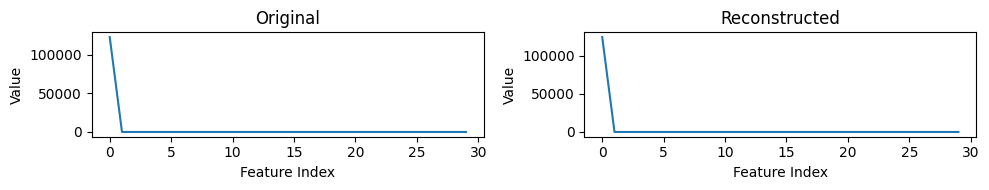

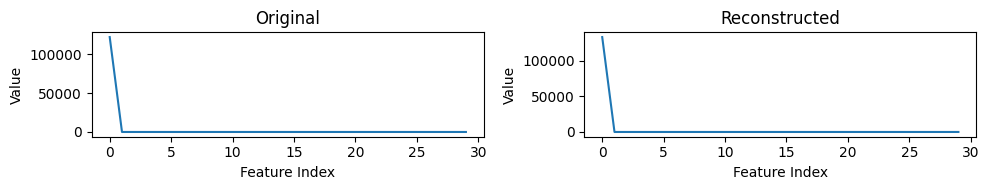

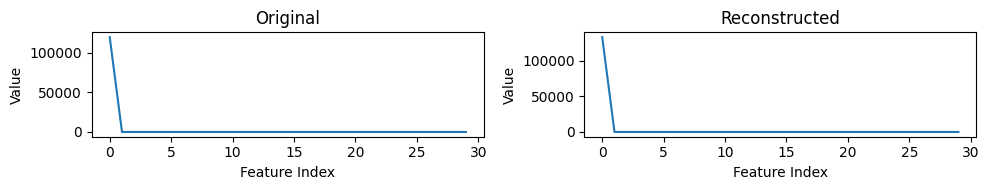

In [36]:
# Get reconstructions from the autoencoder
autoencoder.eval()
with torch.no_grad():
    normalized_inputs = normalizer(test_instances_tensor)
    reconstructions = autoencoder(normalized_inputs)
    denormalized_reconstructions = denormalizer(reconstructions)

denormalized_inputs = test_instances_tensor

# Visualize each instance
for i in range(test_instances_tensor.shape[0]):
    plt.figure(figsize=(10, 2))
    
    plt.subplot(1, 2, 1)
    plt.plot(denormalized_inputs[i].cpu().numpy())
    plt.title('Original')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    
    plt.subplot(1, 2, 2)
    plt.plot(denormalized_reconstructions[i].cpu().numpy())
    plt.title('Reconstructed')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()

#### Normalized View

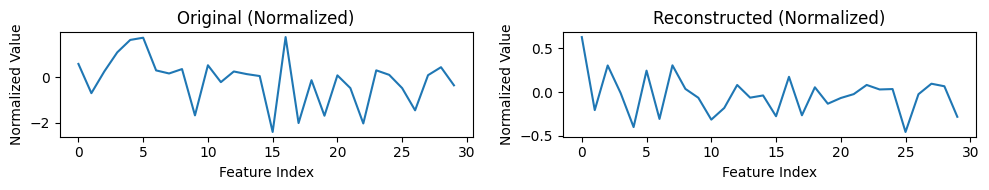

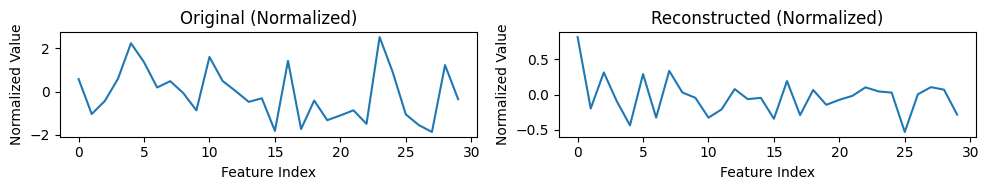

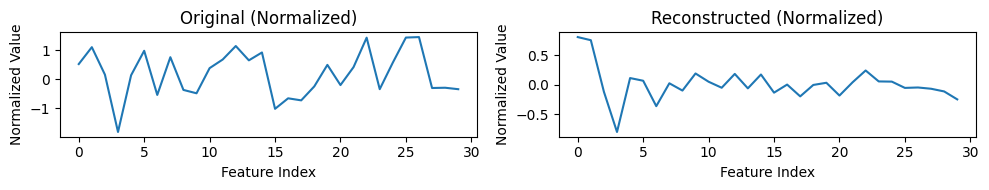

In [37]:
# Visualize normalized inputs and reconstructions
for i in range(test_instances_tensor.shape[0]):
    plt.figure(figsize=(10, 2))
    
    plt.subplot(1, 2, 1)
    plt.plot(normalized_inputs[i].cpu().numpy())
    plt.title('Original (Normalized)')
    plt.xlabel('Feature Index')
    plt.ylabel('Normalized Value')
    
    plt.subplot(1, 2, 2)
    plt.plot(reconstructions[i].cpu().numpy())
    plt.title('Reconstructed (Normalized)')
    plt.xlabel('Feature Index')
    plt.ylabel('Normalized Value')
    
    plt.tight_layout()
    plt.show()

In [38]:
sample_output

{'normalized_reconstruction': tensor([[ 0.6292, -0.2055,  0.3048, -0.0111, -0.3995,  0.2456, -0.3064,  0.3064,
           0.0368, -0.0646, -0.3143, -0.1811,  0.0817, -0.0632, -0.0380, -0.2757,
           0.1750, -0.2647,  0.0553, -0.1325, -0.0672, -0.0228,  0.0820,  0.0304,
           0.0350, -0.4555, -0.0238,  0.0962,  0.0671, -0.2820],
         [ 0.8121, -0.1975,  0.3120, -0.0975, -0.4352,  0.2889, -0.3264,  0.3339,
           0.0297, -0.0469, -0.3272, -0.2105,  0.0768, -0.0658, -0.0469, -0.3426,
           0.1908, -0.2908,  0.0645, -0.1454, -0.0748, -0.0185,  0.1016,  0.0441,
           0.0269, -0.5295,  0.0034,  0.1044,  0.0684, -0.2841],
         [ 0.8128,  0.7595, -0.1178, -0.8003,  0.1161,  0.0705, -0.3615,  0.0274,
          -0.0964,  0.1940,  0.0536, -0.0485,  0.1866, -0.0588,  0.1766, -0.1319,
           0.0053, -0.1951, -0.0010,  0.0361, -0.1810,  0.0438,  0.2448,  0.0590,
           0.0556, -0.0511, -0.0441, -0.0655, -0.1112, -0.2463]]),
 'normalized_reconstruction_errors':

---
## Model Saving and Serving

Save models in multiple formats:

### PyTorch Native Format

In [39]:
PYTORCH_DIR = os.path.join(DIR, "pytorch")
os.makedirs(PYTORCH_DIR, exist_ok=True)

# Save individual components
torch.save(autoencoder.state_dict(), os.path.join(PYTORCH_DIR, "autoencoder.pt"))
torch.save(encoder_model.state_dict(), os.path.join(PYTORCH_DIR, "encoder.pt"))
torch.save(normalizer.state_dict(), os.path.join(PYTORCH_DIR, "normalizer.pt"))
torch.save(denormalizer.state_dict(), os.path.join(PYTORCH_DIR, "denormalizer.pt"))

# Save final model
torch.save(final_model.state_dict(), os.path.join(PYTORCH_DIR, "final_model.pt"))

print("Saved PyTorch models:")
print(f"  - autoencoder.pt")
print(f"  - encoder.pt")
print(f"  - normalizer.pt")
print(f"  - denormalizer.pt")
print(f"  - final_model.pt")

Saved PyTorch models:
  - autoencoder.pt
  - encoder.pt
  - normalizer.pt
  - denormalizer.pt
  - final_model.pt


### Load and Test PyTorch Models

Verify that saved models can be loaded:

In [40]:
# Create fresh model instances
loaded_autoencoder = Autoencoder(input_dim=len(var_numeric), latent_dim=4).to(device)
loaded_autoencoder.load_state_dict(torch.load(os.path.join(PYTORCH_DIR, "autoencoder.pt"), weights_only=True))
loaded_autoencoder.eval()

# Test loaded model
with torch.no_grad():
    test_input = test_instances_tensor[0:1]
    test_normalized = normalizer(test_input)
    loaded_output = loaded_autoencoder(test_normalized)
    
print("✅ Successfully loaded and tested autoencoder")
print(f"Output shape: {loaded_output.shape}")

✅ Successfully loaded and tested autoencoder
Output shape: torch.Size([1, 30])


---
## Model Archive (.mar) for TorchServe

Create a `.mar` file suitable for TorchServe deployment.

### Create Custom Handler

The handler converts HTTP requests to tensors and back:

In [41]:
# Create handler code
handler_code = '''import torch
import json
import logging

logger = logging.getLogger(__name__)

class ModelHandler:
    def __init__(self):
        self.model = None
        self.initialized = False
    
    def initialize(self, context):
        """Initialize model"""
        properties = context.system_properties
        model_dir = properties.get("model_dir")
        
        # Determine device
        if torch.cuda.is_available():
            self.device = torch.device("cuda:" + str(properties.get("gpu_id", 0)))
        else:
            self.device = torch.device("cpu")
        
        # Load TorchScript model
        model_path = f"{model_dir}/final_model_traced.pt"
        self.model = torch.jit.load(model_path, map_location=self.device)
        self.model.eval()
        
        self.initialized = True
        logger.info(f"Model loaded successfully on {self.device}")
    
    def preprocess(self, data):
        """
        Preprocess input data for inference.
        
        Args:
            data: List where each element is a request body (one per instance)
        
        Returns:
            Tensor ready for inference [batch_size, num_features]
        """
        instances = []
        
        for row in data:
            # Each row is one instance
            # It could be: raw list, bytes, string, or dict with 'body' key
            
            if isinstance(row, dict):
                # Try to extract the actual data
                instance = row.get("body") or row.get("data") or row
            else:
                instance = row
            
            # Decode if bytes
            if isinstance(instance, (bytes, bytearray)):
                instance = instance.decode("utf-8")
            
            # Parse JSON string
            if isinstance(instance, str):
                instance = json.loads(instance)
            
            # instance should now be a list of 30 numbers
            if isinstance(instance, list):
                # Verify it's a flat list of numbers (30 features)
                if all(isinstance(x, (int, float)) for x in instance):
                    instances.append(instance)
                else:
                    # It might be nested, flatten it
                    logger.warning(f"Unexpected nested structure: {type(instance)}")
                    instances.append(instance)
            else:
                logger.error(f"Unexpected instance type: {type(instance)}, value: {instance}")
                raise ValueError(f"Instance must be a list of numbers, got {type(instance)}")
        
        # Convert to tensor [batch_size, 30]
        logger.info(f"Preprocessing {len(instances)} instances")
        tensor = torch.tensor(instances, dtype=torch.float32).to(self.device)
        logger.info(f"Input tensor shape: {tensor.shape}")
        return tensor
    
    def inference(self, data):
        """Run inference"""
        with torch.no_grad():
            output = self.model(data)
        return output
    
    def postprocess(self, inference_output):
        """
        Convert model output to JSON-serializable format.
        
        Returns:
            List of predictions (one dict per instance)
        """
        # Determine batch size
        batch_size = None
        for key, value in inference_output.items():
            if torch.is_tensor(value):
                if value.dim() > 0:
                    batch_size = value.shape[0]
                    break
        
        if batch_size is None:
            batch_size = 1
        
        logger.info(f"Postprocessing {batch_size} predictions")
        
        # Build list of predictions (one dict per instance)
        result_dicts = []
        for i in range(batch_size):
            pred = {}
            for key, value in inference_output.items():
                if torch.is_tensor(value):
                    if value.dim() == 0:
                        # Scalar
                        pred[key] = value.item()
                    elif value.dim() == 1:
                        # 1D tensor - one value per instance
                        pred[key] = value[i].item()
                    else:
                        # 2D+ tensor - one row per instance
                        pred[key] = value[i].cpu().numpy().tolist()
                else:
                    pred[key] = value
            result_dicts.append(pred)
        
        return result_dicts

# Instantiate handler
_service = ModelHandler()

def handle(data, context):
    """TorchServe entry point"""
    try:
        if not _service.initialized:
            _service.initialize(context)
        
        if data is None:
            return None
        
        logger.info(f"Received {len(data)} request(s)")
        
        # Preprocess
        input_tensor = _service.preprocess(data)
        
        # Inference
        output = _service.inference(input_tensor)
        
        # Postprocess
        return _service.postprocess(output)
        
    except Exception as e:
        logger.error(f"Error in handle: {str(e)}", exc_info=True)
        raise
'''

# Write handler to file
with open(os.path.join(DIR, "handler.py"), "w") as f:
    f.write(handler_code)

print("✅ Created handler.py")

✅ Created handler.py


### Save Model for MAR (TorchScript Format)

We need to use TorchScript for .mar compatibility:

In [42]:
# Save model in TorchScript format for .mar
final_model.eval()

# Create example input for tracing
example_input = torch.randn(1, len(var_numeric)).to(device)

# Trace the model (strict=False allows dict outputs)
traced_model = torch.jit.trace(final_model, example_input, strict=False)

# Save traced model
traced_model.save(os.path.join(DIR, "final_model_traced.pt"))

print("✅ Saved TorchScript traced model")

✅ Saved TorchScript traced model


### Create Model Archive (.mar) File

In [43]:
# Create .mar file using torch-model-archiver
import subprocess

mar_command = [
    "torch-model-archiver",
    "--model-name", "pytorch_autoencoder",
    "--version", "1.0",
    "--serialized-file", os.path.join(DIR, "final_model_traced.pt"),
    "--handler", os.path.join(DIR, "handler.py"),
    "--export-path", DIR,
    "--force"
]

result = subprocess.run(mar_command, capture_output=True, text=True)

if result.returncode == 0:
    print("✅ Successfully created .mar file")
    print(f"Location: {os.path.join(DIR, 'pytorch_autoencoder.mar')}")
else:
    print("❌ Error creating .mar file:")
    print(result.stderr)

✅ Successfully created .mar file
Location: files/pytorch-autoencoder/pytorch_autoencoder.mar


### Verify MAR File

Let's verify the contents of the .mar file:

In [44]:
import zipfile

mar_path = os.path.join(DIR, "pytorch_autoencoder.mar")

if os.path.exists(mar_path):
    with zipfile.ZipFile(mar_path, 'r') as zip_ref:
        print("Contents of .mar file:")
        for name in zip_ref.namelist():
            info = zip_ref.getinfo(name)
            print(f"  - {name} ({info.file_size:,} bytes)")
    
    # Get file size
    file_size = os.path.getsize(mar_path)
    print(f"\nTotal .mar file size: {file_size:,} bytes ({file_size / 1024:.2f} KB)")
else:
    print("❌ .mar file not found")

Contents of .mar file:
  - handler.py (4,888 bytes)
  - final_model_traced.pt (47,408 bytes)
  - MAR-INF/MANIFEST.json (254 bytes)

Total .mar file size: 29,851 bytes (29.15 KB)


### Preparing the Model for Dataflow RunInference

The .mar file can also be used with Apache Beam's `RunInference` for batch and streaming inference in Dataflow. Let's extract the traced model and show how it can be used:

#### Extract the Traced Model from .mar File

In [45]:
# The .mar file is a ZIP archive - we can extract the traced model
DATAFLOW_DIR = os.path.join(DIR, "dataflow")
os.makedirs(DATAFLOW_DIR, exist_ok=True)

mar_path = os.path.join(DIR, "pytorch_autoencoder.mar")

if os.path.exists(mar_path):
    with zipfile.ZipFile(mar_path, 'r') as zip_ref:
        # Extract just the traced model
        zip_ref.extract('final_model_traced.pt', DATAFLOW_DIR)
    
    print(f"✅ Extracted traced model to: {DATAFLOW_DIR}/final_model_traced.pt")
else:
    print("❌ .mar file not found - run the previous cells to create it")

✅ Extracted traced model to: files/pytorch-autoencoder/dataflow/final_model_traced.pt


#### Load and Test the Extracted Model

In [46]:
# Load the extracted TorchScript model
extracted_model_path = os.path.join(DATAFLOW_DIR, "final_model_traced.pt")
dataflow_model = torch.jit.load(extracted_model_path, map_location=device)
dataflow_model.eval()

# Test it with sample data
with torch.no_grad():
    dataflow_output = dataflow_model(test_instances_tensor)

print("✅ Successfully loaded extracted model")
print(f"\nModel output type: {type(dataflow_output)}")
print(f"Available output keys: {list(dataflow_output.keys())}")

✅ Successfully loaded extracted model

Model output type: <class 'dict'>
Available output keys: ['normalized_reconstruction', 'normalized_reconstruction_errors', 'normalized_MAE', 'normalized_RMSE', 'normalized_MSE', 'normalized_MSLE', 'denormalized_reconstruction', 'denormalized_reconstruction_errors', 'denormalized_MAE', 'denormalized_RMSE', 'denormalized_MSE', 'denormalized_MSLE', 'encoded']


#### Accessing Specific Outputs for Dataflow

The model returns a comprehensive dictionary. In Dataflow, you can extract just the outputs you need:

In [47]:
# Example: Extract just the reconstruction errors for anomaly detection
reconstruction_errors = dataflow_output['normalized_reconstruction_errors']

print("Normalized Reconstruction Errors:")
print(f"  Shape: {reconstruction_errors.shape}")
print(f"  First instance errors:\n{reconstruction_errors[0].cpu().numpy()}")

# Example: Extract just the anomaly scores (MAE per instance)
anomaly_scores = dataflow_output['denormalized_MAE']

print(f"\nAnomaly Scores (Denormalized MAE):")
print(f"  Shape: {anomaly_scores.shape}")
print(f"  Values: {anomaly_scores.cpu().numpy()}")

# Example: Extract encoded representations for similarity search
encoded = dataflow_output['encoded']

print(f"\nEncoded Representations (Latent Space):")
print(f"  Shape: {encoded.shape}")
print(f"  First instance: {encoded[0].cpu().numpy()}")

Normalized Reconstruction Errors:
  Shape: torch.Size([3, 30])
  First instance errors:
[-3.84589434e-02 -4.86739635e-01 -4.21209633e-02  1.11094165e+00
  2.04333186e+00  1.49568415e+00  6.12873793e-01 -1.34289607e-01
  3.28099549e-01 -1.60160375e+00  8.46906304e-01 -2.69564092e-02
  1.77900508e-01  2.07426593e-01  9.75303426e-02 -2.11961102e+00
  1.59408784e+00 -1.73951745e+00 -1.78749964e-01 -1.54965484e+00
  1.56284228e-01 -4.46384639e-01 -2.10323238e+00  2.79048353e-01
  7.68420547e-02 -1.46047175e-02 -1.42107582e+00  4.58449125e-04
  3.79975379e-01 -6.60981536e-02]

Anomaly Scores (Denormalized MAE):
  Shape: torch.Size([3])
  Values: [ 62.15265 373.45367 465.07672]

Encoded Representations (Latent Space):
  Shape: torch.Size([3, 4])
  First instance: [0.         0.         0.09415397 0.        ]


#### Using in Dataflow RunInference

When using this model in a Dataflow pipeline with Apache Beam's `RunInference`:

```python
# In your Dataflow pipeline (pseudocode)
from apache_beam.ml.inference.pytorch_inference import PytorchModelHandlerTensor

# Load the model from the extracted .pt file
model_handler = PytorchModelHandlerTensor(
    state_dict_path='path/to/final_model_traced.pt',
    model_class=None,  # Not needed for TorchScript models
    device='cpu'
)

# In your pipeline
predictions = (
    input_data
    | beam.Map(lambda x: torch.tensor(x, dtype=torch.float32))
    | RunInference(model_handler)
    | beam.Map(lambda pred: {
        'reconstruction_errors': pred['normalized_reconstruction_errors'].tolist(),
        'anomaly_score': pred['denormalized_MAE'].item(),
        'encoded': pred['encoded'].tolist()
    })
)
```

**Key Points:**
- ✅ Single .mar file serves both TorchServe and Dataflow
- ✅ Extract .pt from .mar at pipeline setup time
- ✅ Choose which outputs to extract based on your use case
- ✅ Works with both bounded (BigQuery) and unbounded (Pub/Sub) sources

**Use Cases:**
- **Bounded**: Batch process historical transactions from BigQuery
- **Unbounded**: Real-time anomaly detection from Pub/Sub streams

---
## Summary

This notebook demonstrated:

✅ **Data Loading**: Loading data from BigQuery and creating PyTorch DataLoaders

✅ **Custom Preprocessing Layers**: Embedding normalization/denormalization in `nn.Module` layers

✅ **Autoencoder Architecture**: Building the exact same architecture as the Keras JAX version

✅ **Explicit Training Loop**: Full control over training with early stopping

✅ **Encoder Extraction**: Creating standalone encoder for embeddings

✅ **Comprehensive Post-Processing**: Matching Keras output structure with detailed metrics

✅ **Model Saving**: Multiple formats (PyTorch native and TorchScript)

✅ **TorchServe Deployment**: Creating .mar file with custom handler

### Key Differences from Keras JAX:

| Aspect | Keras JAX | PyTorch |
|--------|-----------|----------|
| Training | `.fit()` method | Explicit loop |
| Preprocessing | `keras.layers.Normalization` | Custom `nn.Module` |
| Backend | JAX (functional) | PyTorch (imperative) |
| Serving | TensorFlow SavedModel | .mar for TorchServe |
| Handler | Not needed (in graph) | Required (minimal) |

### Advantages of PyTorch Approach:

- More explicit control over training process
- Easier debugging with Python-native code
- Flexible dynamic computation graphs
- Growing ecosystem for production deployment

### Next Steps:

- Deploy .mar file to TorchServe instance
- Implement batch prediction endpoints
- Compare performance with Keras JAX version
- Explore ONNX export for cross-framework compatibility